In [28]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [29]:
rows = 3
columns = 4
terminal_state_win = (0, 3)
terminal_state_lose = (1, 3)
starting_state = (2, 0)
policy = 0.25
dis_factor = 0.9

In [30]:
class GridWorld:
    def __init__(self):
        self.cur_state = starting_state
        self.board = np.zeros([rows, columns])
        self.board[1, 1] = -1
        self.is_terminal = False

    def terminal_state(self):
        if (self.cur_state == terminal_state_win) or (
            self.cur_state == terminal_state_lose
        ):
            self.is_terminal = True

    def reward(self, state):
        if state == terminal_state_win:
            return 1
        if state == terminal_state_lose:
            return -1
        else:
            return 0

    def update_position(self, action):
        if action == "up":
            next_state = (self.cur_state[0] - 1, self.cur_state[1])
        elif action == "down":
            next_state = (self.cur_state[0] + 1, self.cur_state[1])
        elif action == "left":
            next_state = (self.cur_state[0], self.cur_state[1] - 1)
        else:
            next_state = (self.cur_state[0], self.cur_state[1] + 1)

        if (next_state[0] >= 0) and (next_state[0] <= 2):
            if (next_state[1] >= 0) and (next_state[1] <= 3):
                if next_state != (1, 1):
                    return next_state
        return self.cur_state

    def state_value_function(self):
        state_matrix = np.array(
            [
                [
                    1 - 0.5 * dis_factor,
                    -0.25 * dis_factor,
                    0,
                    -0.25 * dis_factor,
                    0,
                    0,
                    0,
                    0,
                    0,
                ],
                [
                    -0.25 * dis_factor,
                    1 - 0.5 * dis_factor,
                    -0.25 * dis_factor,
                    0,
                    0,
                    0,
                    0,
                    0,
                    0,
                ],
                [
                    0,
                    -0.25 * dis_factor,
                    1 - 0.25 * dis_factor,
                    0,
                    -0.25 * dis_factor,
                    0,
                    0,
                    0,
                    0,
                ],
                [
                    -0.25 * dis_factor,
                    0,
                    0,
                    1 - 0.5 * dis_factor,
                    0,
                    -0.25 * dis_factor,
                    0,
                    0,
                    0,
                ],
                [
                    0,
                    0,
                    -0.25 * dis_factor,
                    0,
                    1 - 0.25 * dis_factor,
                    0,
                    0,
                    -0.25 * dis_factor,
                    0,
                ],
                [
                    0,
                    0,
                    0,
                    -0.25 * dis_factor,
                    0,
                    1 - 0.5 * dis_factor,
                    -0.25 * dis_factor,
                    0,
                    0,
                ],
                [
                    0,
                    0,
                    0,
                    0,
                    0,
                    -0.25 * dis_factor,
                    1 - 0.5 * dis_factor,
                    -0.25 * dis_factor,
                    0,
                ],
                [
                    0,
                    0,
                    0,
                    0,
                    -0.25 * dis_factor,
                    0,
                    -0.25 * dis_factor,
                    1 - 0.25 * dis_factor,
                    -0.25 * dis_factor,
                ],
                [
                    0,
                    0,
                    0,
                    0,
                    0,
                    0,
                    0,
                    -0.25 * dis_factor,
                    1 - 0.5 * dis_factor,
                ],
            ]
        )
        reward_vector = np.array([0, 0, 0.25, 0, -0.25, 0, 0, 0, -0.25])
        value = np.linalg.solve(state_matrix, reward_vector)
        state_value = np.array(
            [
                [value[0], value[1], value[2], 0],
                [value[3], 0, value[4], 0],
                [value[5], value[6], value[7], value[8]],
            ]
        )
        return state_value.round(5)

    def action_value_function(self, value_function):
        Q_S00_U = 0 + dis_factor * (value_function[0][0])
        Q_S00_D = 0 + dis_factor * (value_function[1][0])
        Q_S00_L = 0 + dis_factor * (value_function[0][0])
        Q_S00_R = 0 + dis_factor * (value_function[0][1])

        Q_S01_U = 0 + dis_factor * (value_function[0][1])
        Q_S01_D = 0 + dis_factor * (value_function[0][1])
        Q_S01_L = 0 + dis_factor * (value_function[0][0])
        Q_S01_R = 0 + dis_factor * (value_function[0][2])

        Q_S02_U = 0 + dis_factor * (value_function[0][2])
        Q_S02_D = 0 + dis_factor * (value_function[1][2])
        Q_S02_L = 0 + dis_factor * (value_function[0][1])
        Q_S02_R = 1 + dis_factor * (value_function[0][3])

        Q_S10_U = 0 + dis_factor * (value_function[0][0])
        Q_S10_D = 0 + dis_factor * (value_function[2][0])
        Q_S10_L = 0 + dis_factor * (value_function[1][0])
        Q_S10_R = 0 + dis_factor * (value_function[1][0])

        Q_S12_U = 0 + dis_factor * (value_function[0][2])
        Q_S12_D = 0 + dis_factor * (value_function[2][2])
        Q_S12_L = 0 + dis_factor * (value_function[1][2])
        Q_S12_R = -1 + dis_factor * (value_function[1][3])

        Q_S20_U = 0 + dis_factor * (value_function[1][0])
        Q_S20_D = 0 + dis_factor * (value_function[2][0])
        Q_S20_L = 0 + dis_factor * (value_function[2][0])
        Q_S20_R = 0 + dis_factor * (value_function[2][1])

        Q_S21_U = 0 + dis_factor * (value_function[2][1])
        Q_S21_D = 0 + dis_factor * (value_function[2][1])
        Q_S21_L = 0 + dis_factor * (value_function[2][0])
        Q_S21_R = 0 + dis_factor * (value_function[2][2])

        Q_S22_U = 0 + dis_factor * (value_function[1][2])
        Q_S22_D = 0 + dis_factor * (value_function[2][2])
        Q_S22_L = 0 + dis_factor * (value_function[2][1])
        Q_S22_R = 0 + dis_factor * (value_function[2][3])

        Q_S23_U = -1 + dis_factor * (value_function[1][3])
        Q_S23_D = 0 + dis_factor * (value_function[2][3])
        Q_S23_L = 0 + dis_factor * (value_function[2][2])
        Q_S23_R = 0 + dis_factor * (value_function[2][3])

        action_value = np.array(
            [
                [Q_S00_U, Q_S00_D, Q_S00_L, Q_S00_R],
                [Q_S01_U, Q_S01_D, Q_S01_L, Q_S01_R],
                [Q_S02_U, Q_S02_D, Q_S02_L, Q_S02_R],
                [0, 0, 0, 0],
                [Q_S10_U, Q_S10_D, Q_S10_L, Q_S10_R],
                [0, 0, 0, 0],
                [Q_S12_U, Q_S12_D, Q_S12_L, Q_S12_R],
                [0, 0, 0, 0],
                [Q_S20_U, Q_S20_D, Q_S20_L, Q_S20_R],
                [Q_S21_U, Q_S21_D, Q_S21_L, Q_S21_R],
                [Q_S22_U, Q_S22_D, Q_S22_L, Q_S22_R],
                [Q_S23_U, Q_S23_D, Q_S23_L, Q_S23_R],
            ]
        )
        return action_value.round(5)

    def show_grid(self):
        self.board[self.cur_state] = 1
        plt.figure(figsize=(6, 4))
        plt.grid()
        plt.locator_params(nbins=4)
        plt.xlim(0, 4)
        plt.ylim(3, 0)
        Values = self.state_value_function()
        for row, column in itertools.product(range(0, rows), range(0, columns)):
            if self.board[row, column] == 1:
                plt.fill_between(
                    [column, column + 1],
                    row,
                    row + 1,
                    facecolor="cyan",
                    interpolate=True,
                )
                plt.text(
                    column + 0.5,
                    row + 0.5,
                    "Agent \n Val: %s" % Values[row][column],
                    fontsize="medium",
                    horizontalalignment="center",
                    verticalalignment="center",
                )
            if self.board[row, column] == -1:
                plt.fill_between(
                    [row, row + 1],
                    column,
                    column + 1,
                    facecolor="grey",
                    interpolate=True,
                )
                plt.text(
                    row + 0.5,
                    column + 0.5,
                    "Wall \n Val: %s" % Values[row][column],
                    fontsize="medium",
                    horizontalalignment="center",
                    verticalalignment="center",
                )
            if self.board[row, column] == 0:
                plt.text(
                    column + 0.5,
                    row + 0.5,
                    "(%s,%s) \n Val: %s" % (row, column, Values[row][column]),
                    fontsize="medium",
                    horizontalalignment="center",
                    verticalalignment="center"
                )
        plt.grid(which="major", axis="both", linestyle="-", color="k", linewidth=2)
        plt.show()

In [31]:
class Agent:
    def __init__(self):
        self.states = []
        self.actions = ["up", "down", "left", "right"]
        self.State = GridWorld()
        self.is_terminal = self.State.is_terminal

        self.state_values = {}
        for row, column in itertools.product(range(0, rows), range(0, columns)):
            self.state_values[(row, column)] = 0

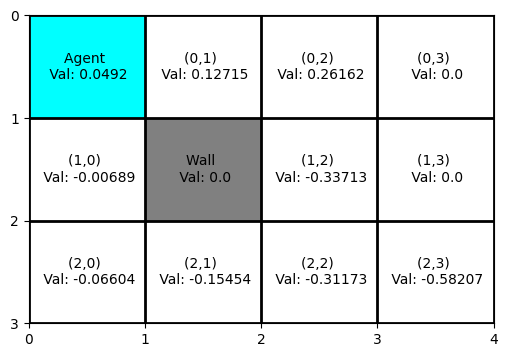

In [32]:
s = GridWorld()
s.show_grid()

In [33]:
x = s.state_value_function()
print(x)

[[ 0.0492   0.12715  0.26162  0.     ]
 [-0.00689  0.      -0.33713  0.     ]
 [-0.06604 -0.15454 -0.31173 -0.58207]]


In [34]:
s.action_value_function(x)

array([[ 0.04428, -0.0062 ,  0.04428,  0.11444],
       [ 0.11444,  0.11444,  0.04428,  0.23546],
       [ 0.23546, -0.30342,  0.11444,  1.     ],
       [ 0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.04428, -0.05944, -0.0062 , -0.0062 ],
       [ 0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.23546, -0.28056, -0.30342, -1.     ],
       [ 0.     ,  0.     ,  0.     ,  0.     ],
       [-0.0062 , -0.05944, -0.05944, -0.13909],
       [-0.13909, -0.13909, -0.05944, -0.28056],
       [-0.30342, -0.28056, -0.13909, -0.52386],
       [-1.     , -0.52386, -0.28056, -0.52386]])